Tentative de connexion aux serveurs de la FED (FRED)...
✅ Succès ! 784 jours de données récupérés.
Sauvegardé sous '../data/financial_data_VIX.csv' (Contient le VIX)


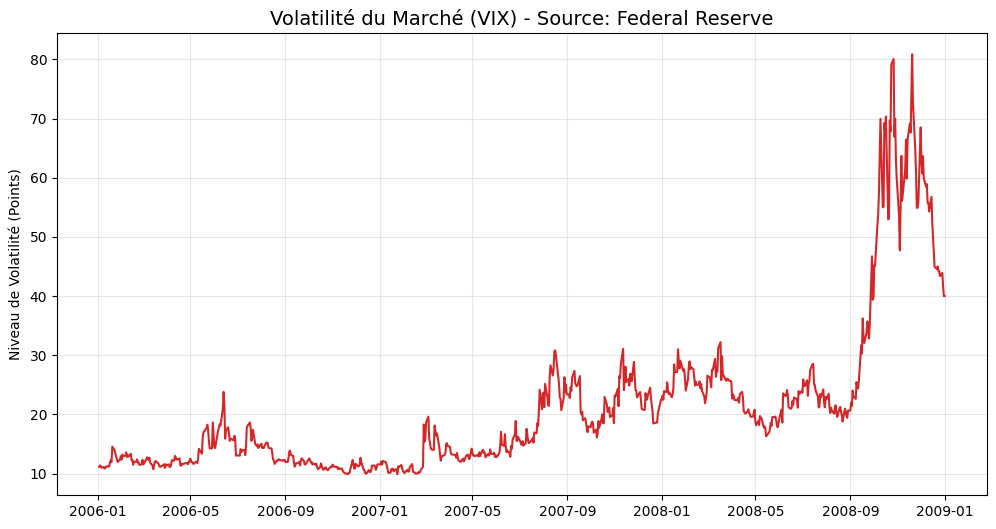

In [9]:
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Configuration
# VIXCLS = Le ticker officiel du VIX chez la FED
START_DATE = '2006-01-01'
END_DATE = '2009-01-01'

print("Tentative de connexion aux serveurs de la FED (FRED)...")

try:
    # On change de source : 'fred' au lieu de 'yahoo'
    df_vol = web.DataReader('VIXCLS', 'fred', start=START_DATE, end=END_DATE)
    
    print(f"✅ Succès ! {len(df_vol)} jours de données récupérés.")
    
    # Nettoyage
    # Le VIX est déjà en % (ex: 20.0), on le garde tel quel ou on divise par 100 selon tes goûts
    df_vol = df_vol.rename(columns={'VIXCLS': 'Volatility'})
    
    # La FED a parfois des trous les jours fériés, on remplit avec la valeur précédente
    df_vol = df_vol.ffill()
    
    # Sauvegarde
    df_vol.to_csv('../data/financial_data_VIX.csv') # On garde ce nom pour que ton script suivant marche
    print("Sauvegardé sous '../data/financial_data_VIX.csv' (Contient le VIX)")

    # Visu
    plt.figure(figsize=(12, 6))
    plt.plot(df_vol.index, df_vol['Volatility'], color='#d62728', lw=1.5)
    plt.title("Volatilité du Marché (VIX) - Source: Federal Reserve", fontsize=14)
    plt.ylabel("Niveau de Volatilité (Points)")
    plt.grid(True, alpha=0.3)
    plt.show()

except Exception as e:
    print(f"❌ Erreur critique : {e}")
    print("Vérifie ta connexion internet ou installe pandas-datareader : pip install pandas-datareader")